# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key= 'f9b3de9264d1831a780da2e78d455112'
units='metric'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace the encoded city space in URL
    city = city.replace(" ", "%20")
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# identiful URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# URL Query
query_url = f"{url}&APPID={api_key}&units={units}&q="

# Lists to hold reponse info
city_name =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp =[]
wind_speed =[]

# API record Calls 
record = 0
set = 1
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
   
    try: 
        response = requests.get(query_url+city).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        if record >= 49:
            record = 0
            set = set+1
            city_name.append(response["name"])
        else:
            record = record + 1
            city_name.append(response["name"])
        
        
        
        
        print(f"Processing Record {record} of set {set}| {city}")
       
        
        
        
        # Wait for two seconds in loop
        time.sleep(2)
        
    except:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 of set 1| cape%20town
Processing Record 2 of set 1| longyearbyen
Processing Record 3 of set 1| mar%20del%20plata
Processing Record 4 of set 1| qaanaaq
Processing Record 5 of set 1| ushuaia
Processing Record 6 of set 1| meulaboh
Processing Record 7 of set 1| klaksvik
Processing Record 8 of set 1| sao%20filipe
Processing Record 9 of set 1| jamestown
Processing Record 10 of set 1| tiksi
City not found. Skipping...
Processing Record 11 of set 1| kiunga
Processing Record 12 of set 1| lorengau
Processing Record 13 of set 1| yasnyy
Processing Record 14 of set 1| hokitika
Processing Record 15 of set 1| busselton
Processing Record 16 of set 1| pangnirtung
Processing Record 17 of set 1| ponta%20do%20sol
Processing Record 18 of set 1| inhambane
Processing Record 19 of set 1| ulagan
Processing Record 20 of set 1| kodiak
Processing Record 21 of set 1| port%20macquarie
Processing Record 22 of set

Processing Record 33 of set 4| babushkin
Processing Record 34 of set 4| karditsa
Processing Record 35 of set 4| coquimbo
Processing Record 36 of set 4| nouadhibou
Processing Record 37 of set 4| half%20moon%20bay
Processing Record 38 of set 4| siderno
Processing Record 39 of set 4| cockburn%20town
Processing Record 40 of set 4| elmadag
Processing Record 41 of set 4| los%20llanos%20de%20aridane
Processing Record 42 of set 4| marystown
Processing Record 43 of set 4| daru
Processing Record 44 of set 4| aasiaat
Processing Record 45 of set 4| clyde%20river
Processing Record 46 of set 4| bilma
Processing Record 47 of set 4| shahdadkot
Processing Record 48 of set 4| harer
Processing Record 49 of set 4| togur
Processing Record 0 of set 5| buraydah
City not found. Skipping...
Processing Record 1 of set 5| yellowknife
Processing Record 2 of set 5| gannan
Processing Record 3 of set 5| adrar
Processing Record 4 of set 5| hangu
Processing Record 5 of set 5| cabatuan
Processing Record 6 of set 5| mar

City not found. Skipping...
Processing Record 18 of set 8| kruisfontein
Processing Record 19 of set 8| salalah
Processing Record 20 of set 8| neiafu
Processing Record 21 of set 8| ziyang
Processing Record 22 of set 8| prainha
Processing Record 23 of set 8| buritizeiro
Processing Record 24 of set 8| port-gentil
Processing Record 25 of set 8| vajszlo
Processing Record 26 of set 8| harper
Processing Record 27 of set 8| bereda
Processing Record 28 of set 8| smiltene
Processing Record 29 of set 8| dongsheng
Processing Record 30 of set 8| teykovo
Processing Record 31 of set 8| kars
City not found. Skipping...
Processing Record 32 of set 8| akhisar
Processing Record 33 of set 8| srandakan
City not found. Skipping...
Processing Record 34 of set 8| belaya%20glina
Processing Record 35 of set 8| menongue
Processing Record 36 of set 8| uige
Processing Record 37 of set 8| airai
Processing Record 38 of set 8| marrakesh
Processing Record 39 of set 8| waverly
City not found. Skipping...
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Bellow is dictionary for establishing DataFrame
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}



In [6]:
# Bellow is the Created DataFrame from the above dictionary
output_data = pd.DataFrame(weather_dict)
# Display dataframe
output_data.head(603)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,75,ZA,1575335566,62,-33.93,18.42,15.56,7.20
1,Longyearbyen,0,NO,1575335666,84,78.22,15.63,-15.00,1.67
2,Mar del Plata,64,AR,1575335669,62,-46.43,-67.52,14.23,8.79
3,Qaanaaq,100,GL,1575335672,57,77.48,-69.36,-14.90,3.27
4,Ushuaia,75,AR,1575335675,76,-54.81,-68.31,10.00,10.80
...,...,...,...,...,...,...,...,...,...
545,Jacareacanga,13,BR,1575337646,64,-6.22,-57.76,26.14,0.77
546,Cotonou,40,BJ,1575337648,88,6.37,2.43,28.00,4.10
547,Codrington,0,AU,1575337652,19,-28.95,153.24,30.00,3.10
548,Kodar,51,IN,1575337656,74,16.98,79.97,24.24,2.42


In [12]:
# Save data frame to CSV

output_data.to_csv("output_data/cities.csv", encoding="utf8")


In [13]:
# Display count of weather data values 
output_data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [14]:
# Display data frame head 
output_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,75,ZA,1575335566,62,-33.93,18.42,15.56,7.20
1,Longyearbyen,0,NO,1575335666,84,78.22,15.63,-15.00,1.67
2,Mar del Plata,64,AR,1575335669,62,-46.43,-67.52,14.23,8.79
3,Qaanaaq,100,GL,1575335672,57,77.48,-69.36,-14.90,3.27
4,Ushuaia,75,AR,1575335675,76,-54.81,-68.31,10.00,10.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

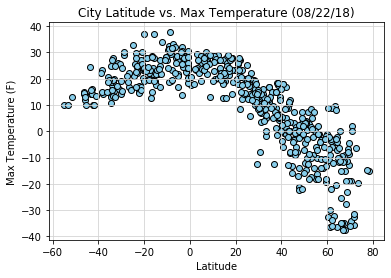

In [16]:
# A scatter plot FOR Latitude vs. Temperature PloT
plt.scatter(output_data["Lat"],output_data["Max Temp"],edgecolors="black",facecolors="skyblue")
# The graph properties
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CitylatitudevsmaxTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

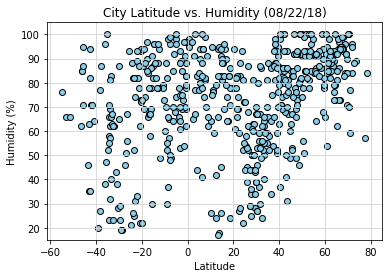

In [17]:
# A scatter plot
plt.scatter(output_data["Lat"],output_data["Humidity"],edgecolors="black",facecolors="skyblue")
#The graph properties
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CitylatitudevsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

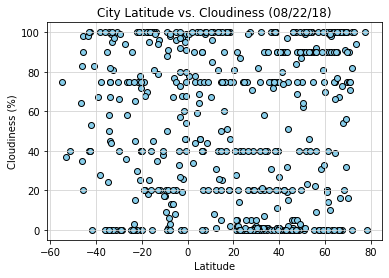

In [18]:
# A scatter plot
plt.scatter(output_data["Lat"],output_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
#The graph properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CitylatitudevsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

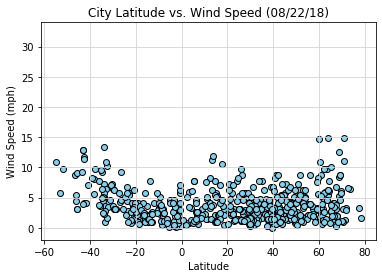

In [19]:

# A scatter plot
plt.scatter(output_data["Lat"],output_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
# The graph properties
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CitylatitudevsWindSpeed.png")
plt.show()

